In [36]:
%matplotlib inline
import numpy as np
from PIL import Image

# READ IN DATA AND STORE IN VARIABLES

# training data
train_cnn = np.load("../CS5785-final-data/alexnet_feat_train.npy")
train_bow = np.load("../CS5785-final-data/SIFTBoW_train.npy")
train_labels = np.genfromtxt("../CS5785-final-data/train.txt",dtype=None)
train_filenames = train_labels[:,0]
train_labels = train_labels[:,1]
train_attribs = np.genfromtxt("../CS5785-final-data/attributes_train.txt",dtype=None)[:,1]

# testing data
test_cnn = np.load("../CS5785-final-data/alexnet_feat_test.npy")
test_bow = np.load("../CS5785-final-data/SIFTBoW_test.npy")
test_filenames = np.genfromtxt("../CS5785-final-data/test.txt",dtype=None)
test_attribs = np.genfromtxt("../CS5785-final-data/attributes_test.txt",dtype=None)[:,1]

# 10k data
tenk_cnn = np.load("../CS5785-final-data/alexnet_feat_10k.npy")
tenk_bow = np.load("../CS5785-final-data/SIFTBoW_10k.npy")
tenk_filenames = np.genfromtxt("../CS5785-final-data/10k_list.txt",dtype=None)

# metadata
attribute_values = [line.rstrip().replace("'", "") for line in open('../CS5785-final-data/attributes_list.txt')]


In [48]:
# HELPER METHODS
def get_filename(index, datatype = "train"):
    if(datatype == "train"):
        name = train_filenames[index]
    elif (datatype == "test"):
        name = test_filenames[index]
    else:
        name = tenk_filenames[index]
    return name

def display_image(filename, datatype = "train"):
    if((datatype == "train") or (datatype == "test")):
        path = '../CS5785-final-data/images/' + datatype + '/' + filename
    else:
        path = '../CS5785-final-data/10k_images/' + filename
        
    im = Image.open(path)
    size = 200,180
    imt = im.convert('RGB')
    imt.thumbnail(size, Image.ANTIALIAS)
    return imt

# sample call
# display_image(get_filename(8, 'att'), 'att')

def kaggle_output(outputs):
    kaggle_output = np.vstack([test_filenames,outputs]).transpose()
    print kaggle_output
    np.savetxt("../kaggle_output.csv", kaggle_output, delimiter=",", header="ID,Category", comments='', fmt="%s")


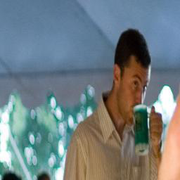

In [47]:
'''
10k_images
10k_images.zip
10k_list.txt -> DONE
alexnet_feat_10k.npy -> DONE
alexnet_feat_test.npy -> DONE
alexnet_feat_train.npy -> DONE
attributes_list.txt -> DONE
attributes_test.txt -> DONE
attributes_train.txt -> DONE
captions.json
images
images.zip
sampleSubmission.csv
SIFTBoW_10k.npy -> DONE
SIFTBoW_test.npy -> DONE
SIFTBoW_train.npy -> DONE
test.txt -> DONE
train.txt -> DONE
'''

def generate_kaggle_csv():
    